**Chapter 4 – Training Linear Models**

# Exercise solutions

## 12. Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn)

1. Load data  
2. randomly initialize parameters  
3. get predictions
4. compute cost function (avg. for all obs) on train data (save this for later)  
5. compute cost function on test data (save this for later)  
6. if test cost went up, stop
7. else, calculate gradient  
8. update parameters   
9. repeat 3-8  



1. Load data
2. Randomly initialize parameter matrix (num features x num classes)
3. get prediction matrix w/ preds for each data point for each class
3. run pred matrix through softmax
4. compute softmax cost on train data
5. compute softmax cost on test data
6. if test cost went up, stop
7. else, calculate gradient


## Notes:  
- So far, softmax_predict outputs for each observation a probability for each class (normalized). I don't have a single prediction for each observation yet. I need to implement this to use for the gradient calculation.
- Make sure that with only two classes I still get the right shapes and outputs

In [69]:
# Load data
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
y_dos = (iris["target"] != 0).astype(np.int)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=42)
y_dos_train, y_dos_test = train_test_split(y_dos, train_size=.8, random_state=42)

In [70]:
# Test 3 classes
    # Add bias term
X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
n_features = X_train.shape[1]
n_classes = np.unique(y_train).shape[0]
y_train_ovr = create_ovr_matrix(y_train)
y_test_ovr = create_ovr_matrix(y_test)
# Randomly initialize parameters
theta = np.random.rand(n_features, n_classes)
alpha = .9

print 'X_train shape:', X_train.shape
print 'n_features:', n_features
print 'n_classes:', n_classes
print theta, '\n'

p_train = softmax_predict(X_train, theta)
p_test = softmax_predict(X_test, theta)
print 'p_train shape:', p_train.shape

train_cost = compute_log_loss(y_train_ovr, p_train)
test_cost = compute_log_loss(y_test_ovr, p_test)
print 'Train cost:', train_cost
print 'Test cost:', test_cost

X_train shape: (120, 3)
n_features: 3
n_classes: 3
[[ 0.53043515  0.7663843   0.74728919]
 [ 0.38271033  0.63412534  0.73441654]
 [ 0.30228966  0.74399661  0.45532296]] 

p_train shape: (120, 3)
Train cost: 0.353555404435
Test cost: 0.355700526206


In [68]:
def logistic_predict(X, theta):
    z = X.dot(theta)
    g = 1.0/(1+np.exp(-z))
    return g

def softmax_predict(X, theta):
    score = X.dot(theta)
    exp_score = np.exp(score)
    sums = exp_score.sum(axis=1, keepdims=True)
    return exp_score/sums

def create_ovr_matrix(y):
    """
    Create one-vs-rest matrix for y labels
    """
    y_ovr = []
    classes = np.unique(y)
    for class_ in classes:
        y_ovr.append((y == class_).astype(int))
    return np.column_stack(y_ovr)

def compute_log_loss(y, p):
    total_loss = y*np.log(p)
    J = -(total_loss.mean())
    return J


def compute_gradients(X, y, theta, p=None):
    m = X.shape[0]
    if p is None:
        p = logistic_predict(X, theta)
    gradients = (p-y).dot(X)/m
    return gradients


def update_parameters(theta, gradients, alpha):
    theta_new = theta - alpha*gradients
    return theta_new

In [20]:
def main(X_train, X_test, y_train, y_test):
    # Add bias term
    X_train = np.c_[np.ones((X_train.shape[0], 1)), X_train]
    X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]
    n_features = X_train.shape[1]
    n_classes = np.unique(y_train).shape[0]
    y_train_ovr = create_ovr_matrix(y_train)
    y_test_ovr = create_ovr_matrix(y_test)
    # Randomly initialize parameters
    theta = np.random.rand(n_features, n_classes)
    prev_test_cost = None
    alpha = .9
    n_steps = 0
    test_cost_list = []
    # Train model until Test cost is higher than it was in the previous iteration
    while True:
        p_train = softmax_predict(X_train, theta)
        p_test = softmax_predict(X_test, theta)
        train_cost = compute_log_loss(y_train_ovr, p_train)
        test_cost = compute_log_loss(y_test_ovr, p_test)
        test_cost_list.append(test_cost)
        print 'Train cost:', train_cost
        print 'Test cost:', test_cost
        if prev_test_cost and test_cost > prev_test_cost:
            break
        prev_test_cost = test_cost
        gradients = compute_gradients(X_train, y_train, theta, p_train)
        theta = update_parameters(theta, gradients, alpha)
        n_steps += 1
        if n_steps > 1000: # Just in case we train for too long
            break
    train_accuracy = accuracy_score(y_train, (p_train >= .5).astype(int))
    test_accuracy = accuracy_score(y_test, (p_test >= .5).astype(int))
    print 'Number of steps:', n_steps
    print 'Parameters:', theta
    print 'Train cost:', train_cost
    print 'Test cost:', test_cost
    print 'Train accuracy:', train_accuracy
    print 'Test accuracy:', test_accuracy
    return test_cost_list
    
    

In [21]:
tcl = main(X_train, X_test, y_train, y_test)

Train cost: 0.800149664865
Test cost: 1.21855393884
Train cost: 0.588770842953
Test cost: 0.894769253829
Train cost: 0.45103787327
Test cost: 0.661884412323
Train cost: 0.416918010719
Test cost: 0.572624624689
Train cost: 0.39730323857
Test cost: 0.55852195926
Train cost: 0.379115012166
Test cost: 0.522336575245
Train cost: 0.362308563221
Test cost: 0.501534829587
Train cost: 0.34659970416
Test cost: 0.475820203406
Train cost: 0.331889629778
Test cost: 0.454848953419
Train cost: 0.318103962543
Test cost: 0.433937192161
Train cost: 0.305180667422
Test cost: 0.414939981147
Train cost: 0.293062516277
Test cost: 0.396985830063
Train cost: 0.281695097098
Test cost: 0.380268251075
Train cost: 0.271026712604
Test cost: 0.36460927823
Train cost: 0.261008482254
Test cost: 0.349957873016
Train cost: 0.251594424623
Test cost: 0.336232293963
Train cost: 0.242741485257
Test cost: 0.323365270751
Train cost: 0.234409500746
Test cost: 0.311292254517
Train cost: 0.226561120493
Test cost: 0.299953908333

## Notes:  
- Figure out how to do one-vs-all and softmax
- eventually delete all the crap from the book above this

In [22]:
import matplotlib.pyplot as plt

%matplotlib inline

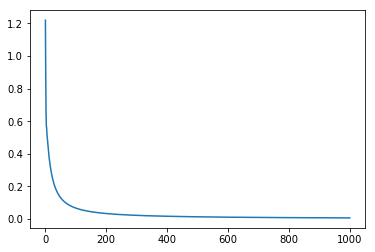

In [24]:
plt.plot(tcl)